In [190]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
pd.set_option('display.max_columns', 500)
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [153]:
def explore_data(df):
    # this function applies many exploratory techniques to a given dataframe
    display("Head",
            df.head()
            .style
            .background_gradient(cmap='Blues')
           )
    display("Data Types",
            df.dtypes
            .to_frame()
           )
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column",
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics",
            df.describe()
           )
    display("Correlation Matrix",
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )

In [154]:
df = pd.read_csv('housing_prices.csv')
explore_data(df)

'Head'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


'Data Types'

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


'Data Types Count'

,0
object,43
int64,35
float64,3


'Nan Values per Column'

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


'Descriptive Statistics'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


'Correlation Matrix'

In [155]:
##Do data exploration, check NaN's, see which kinds of types it are and check documentation on dataset. 
df_to_check = df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt',
                'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
                'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical']]

explore_data(df_to_check) ##Between the columns that do have numbers there is not a correlation that seems to be important.
# Mostly object values, the biggest NaN value column of pools (1453) has mostly also other values missing. 
# The total rows in this df are 1460. So for the sake of time I will all drop these.

'Head'

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical
0,nan,nan,nan,nan,nan,65,2003,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,196,BrkFace,SBrkr
1,nan,nan,nan,nan,TA,80,1976,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,0,None,SBrkr
2,nan,nan,nan,nan,TA,68,2001,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,162,BrkFace,SBrkr
3,nan,nan,nan,nan,Gd,60,1998,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,0,None,SBrkr
4,nan,nan,nan,nan,TA,84,2000,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,350,BrkFace,SBrkr


'Data Types'

,0
PoolQC,object
MiscFeature,object
Alley,object
Fence,object
FireplaceQu,object
LotFrontage,float64
GarageYrBlt,float64
GarageCond,object
GarageType,object
GarageFinish,object


'Data Types Count'

,0
object,16
float64,3


'Nan Values per Column'

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageQual,81
GarageFinish,81
GarageCond,81


'Descriptive Statistics'

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


'Correlation Matrix'

,LotFrontage,GarageYrBlt,MasVnrArea
LotFrontage,1,0.07,0.19
GarageYrBlt,0.07,1,0.25
MasVnrArea,0.19,0.25,1


In [156]:
df_to_check.shape

(1460, 19)

In [157]:
New_df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt',
                'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
                'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType', 'Electrical'])

In [158]:
explore_data(New_df)

'Head'

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


'Data Types'

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotArea,int64
Street,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object


'Data Types Count'

,0
int64,35
object,27


'Nan Values per Column'

,0
Id,0
Fireplaces,0
1stFlrSF,0
2ndFlrSF,0
LowQualFinSF,0
GrLivArea,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0


'Descriptive Statistics'

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


'Correlation Matrix'

In [159]:
New_df.shape

(1460, 62)

In [160]:
###let's see what we can encode fast to make numbers out of it. 
New_df.columns
### I will drop street and neighborhood, I would encode this with onehotencoder, but it's to much detail for a first analysis
New_df = New_df.drop(columns=[ 'Street', 'Neighborhood', 'MSZoning'])

In [161]:
New_df.dtypes

Id                int64
MSSubClass        int64
LotArea           int64
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd    

In [162]:
New_df.head()

,Id,MSSubClass,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,8450,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,9600,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,11250,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,9550,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,14260,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [164]:
for col in New_df.columns:
    print (New_df[col].unique())

[   1    2    3 ... 1458 1459 1460]
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
[ 8450  9600 11250 ... 17217 13175  9717]
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
[ 7  6  8  5  9  4 10  3  1  2]
[5 8 6 7 4 2 3 9 1]
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 19

In [165]:
labelencoder = LabelEncoder()

New_df['LotShape'] = labelencoder.fit_transform(New_df['LotShape'])
New_df['LandContour'] = labelencoder.fit_transform(New_df['LandContour'])
New_df['Utilities'] = labelencoder.fit_transform(New_df['Utilities'])
New_df['LotConfig'] = labelencoder.fit_transform(New_df['LotConfig'])
New_df['LandSlope'] = labelencoder.fit_transform(New_df['LandSlope'])
New_df['Condition1'] = labelencoder.fit_transform(New_df['Condition1'])
New_df['Condition2'] = labelencoder.fit_transform(New_df['Condition2'])
New_df['BldgType'] = labelencoder.fit_transform(New_df['BldgType'])
New_df['HouseStyle'] = labelencoder.fit_transform(New_df['HouseStyle'])
New_df['RoofStyle'] = labelencoder.fit_transform(New_df['RoofStyle'])
New_df['RoofMatl'] = labelencoder.fit_transform(New_df['RoofMatl'])
New_df['Exterior1st'] = labelencoder.fit_transform(New_df['Exterior1st'])
New_df['Exterior2nd'] = labelencoder.fit_transform(New_df['Exterior2nd'])
New_df['ExterQual'] = labelencoder.fit_transform(New_df['ExterQual'])
New_df['ExterCond'] = labelencoder.fit_transform(New_df['ExterCond'])
New_df['Foundation'] = labelencoder.fit_transform(New_df['Foundation'])
New_df['Heating'] = labelencoder.fit_transform(New_df['Heating'])
New_df['HeatingQC'] = labelencoder.fit_transform(New_df['HeatingQC'])
New_df['CentralAir'] = labelencoder.fit_transform(New_df['CentralAir'])
New_df['KitchenQual'] = labelencoder.fit_transform(New_df['KitchenQual'])
New_df['Functional'] = labelencoder.fit_transform(New_df['Functional'])
New_df['PavedDrive'] = labelencoder.fit_transform(New_df['PavedDrive'])
New_df['SaleType'] = labelencoder.fit_transform(New_df['SaleType'])
New_df['SaleCondition'] = labelencoder.fit_transform(New_df['SaleCondition'])

In [166]:
New_df = New_df.set_index('Id')
New_df.dtypes ###all numbers 

MSSubClass       int64
LotArea          int64
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating          int32
HeatingQC        int32
CentralAir       int32
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual      int32
TotRmsAbvGrd     int64
Functional       int32
Fireplaces       int64
GarageCars 

In [167]:
New_df.head()
New_std = New_df
New_df_with_price = New_df

In [168]:
explore_data(New_df)

'Head'

,MSSubClass,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,3,3,0,4,0,2,2,0,5,7,5,2003,2003,1,1,12,13,2,4,2,706,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
2,20,9600,3,3,0,2,0,1,2,0,2,6,8,1976,1976,1,1,8,8,3,4,1,978,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
3,60,11250,0,3,0,4,0,2,2,0,5,7,5,2001,2002,1,1,12,13,2,4,2,486,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
4,70,9550,0,3,0,0,0,2,2,0,5,7,5,1915,1970,1,1,13,15,3,4,0,216,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
5,60,14260,0,3,0,2,0,2,2,0,5,8,5,2000,2000,1,1,12,13,2,4,2,655,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


'Data Types'

,0
MSSubClass,int64
LotArea,int64
LotShape,int32
LandContour,int32
Utilities,int32
LotConfig,int32
LandSlope,int32
Condition1,int32
Condition2,int32
BldgType,int32


'Data Types Count'

,0
int64,34
int32,24


'Nan Values per Column'

,0
MSSubClass,0
GarageCars,0
LowQualFinSF,0
GrLivArea,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0


'Descriptive Statistics'

,MSSubClass,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1.942466,2.777397,0.000685,3.019178,0.062329,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,2.539726,3.733562,1.396575,443.639726,46.549315,567.240411,1057.429452,1.036301,1.538356,0.934932,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,1.767123,472.980137,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,9981.264932,1.409156,0.707666,0.026171,1.622634,0.276232,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.693995,0.731807,0.722394,456.098091,161.319273,441.866955,438.705324,0.295124,1.739524,0.246731,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,0.747315,213.804841,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,7553.500000,0.000000,3.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,1.000000,1.000000,8.000000,8.000000,2.000000,4.000000,1.000000,0.000000,0.000000,223.000000,795.750000,1.000000,0.000000,1.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,6.000000,0.000000,1.000000,334.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,9478.500000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,2.000000,0.000000,2.000000,6.000000,5.000000,1973.000000,1994.000000,1.000000,1.000000,12.000000,13.000000,3.000000,4.000000,1.000000,383.500000,0.000000,477.500000,991.500000,1.000000,0.000000,1.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,6.000000,1.000000,2.000000,480.000000,2.000000

'Correlation Matrix'

In [169]:
###Correlation thresholds
Y = New_df['SalePrice']
New_df =  New_df.drop(columns=['SalePrice'])

In [171]:
from factor_analyzer.factor_analyzer import calculate_kmo
#Is our dataset suitable for factor analysis so we can have better oversight?
kmo_all,kmo_model=calculate_kmo(New_df)

In [172]:
kmo_model #score over 0.6, so it's suitable for factor analysis. 

0.6541068134180804

In [173]:
fa = FactorAnalyzer()
fa.fit(New_df)
ev, v = fa.get_eigenvalues()
ev #15 are above 1.0 so we should choose 15, but for the sake of time I will choose 5. 

array([ 8.08602989e+00,  3.48717800e+00,  3.11822231e+00,  2.56469822e+00,
        2.13351151e+00,  1.82576206e+00,  1.55185451e+00,  1.46325641e+00,
        1.41173932e+00,  1.32856107e+00,  1.23295502e+00,  1.21272938e+00,
        1.20635994e+00,  1.15980155e+00,  1.11488584e+00,  1.09332150e+00,
        1.07511029e+00,  1.02514591e+00,  1.00938066e+00,  9.88819260e-01,
        9.72531256e-01,  9.63462079e-01,  9.08599108e-01,  9.04856514e-01,
        8.71568401e-01,  8.47784681e-01,  8.36670506e-01,  8.32878327e-01,
        8.11095136e-01,  7.76337765e-01,  7.37780940e-01,  7.34700971e-01,
        6.94920724e-01,  6.71179883e-01,  6.32638321e-01,  6.15844771e-01,
        5.79955112e-01,  5.71866574e-01,  5.49964874e-01,  5.21247672e-01,
        4.84809256e-01,  4.17487007e-01,  4.08476763e-01,  3.93695904e-01,
        3.52312967e-01,  3.25066865e-01,  2.71729614e-01,  2.38087687e-01,
        2.28357022e-01,  1.79929583e-01,  1.38488434e-01,  1.31912731e-01,
        1.10700714e-01,  

In [174]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(New_df)
data = fa.loadings_

In [175]:
dataset = pd.DataFrame(data)
dataset

,0,1,2,3,4
0,0.036820,0.158887,-0.210527,-0.229641,0.738877
1,0.006734,0.141699,0.151316,0.422234,-0.109073
2,-0.218010,-0.112670,-0.025066,-0.206131,0.108984
3,0.147706,-0.059354,-0.033634,-0.127642,0.038720
4,-0.016744,-0.002813,-0.003746,0.035840,0.003063
5,0.003310,-0.073198,0.003017,-0.128340,0.075632
6,-0.055081,-0.020802,-0.005983,0.305187,-0.020162
7,0.160510,0.035195,-0.009915,0.012816,-0.020230
8,0.005915,0.011020,0.052190,0.012741,-0.004187
9,0.176973,-0.171118,0.051728,-0.291140,0.694711


In [176]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4
0,5.159830,4.480851,2.981687,2.471575,1.907488
1,0.090523,0.078611,0.052310,0.043361,0.033465
2,0.090523,0.169135,0.221445,0.264806,0.298271


In [177]:
#Total 29.8% cumulative Variance explained by the 5 factors. I've got a bit lost in factor analysis, as I have not too much 
# time let I will leave it now and do machine learning on the rest of the data set. The factor analysis would be awesome
# to use for doing predictions and seeing connections between things that maybe at first sight are not connected. 

In [178]:
#New_std

In [179]:
scaler = StandardScaler()
New_std = scaler.fit_transform(New_std)

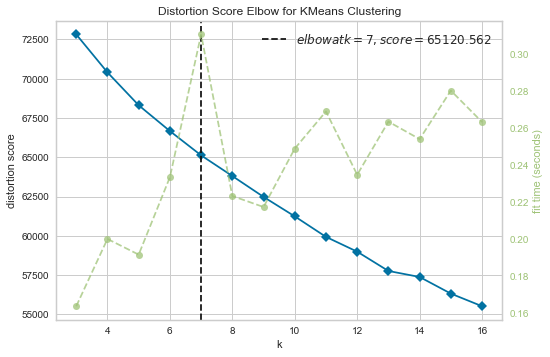

In [180]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(New_std)
visualizer.poof()

In [181]:
## I get the output to use 8 clusters, lets see what that does. 
n_clusters = 8
cluster = KMeans(n_clusters=n_clusters)
# Train model
New_std_cluster = cluster.fit(New_std)

In [193]:
New_df['labels'] = New_std_cluster.labels_

In [195]:
New_df.groupby('labels').mean().describe().round(1) 

,MSSubClass,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
count,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
mean,62.2,13522.9,1.7,2.7,0.1,2.7,0.1,2.0,2.0,0.7,3.5,6.2,5.6,1968.8,1981.6,1.4,1.2,9.1,9.7,2.6,3.8,1.4,431.7,90.6,554.5,1076.7,1.1,1.6,0.9,1268.5,349.8,8.8,1627.1,0.4,0.2,1.6,0.3,3.0,1.1,2.3,6.9,5.7,0.7,1.8,493.7,1.8,91.5,60.0,19.4,2.6,45.6,7.7,51.0,5.7,2007.9,6.5,3.3,185123.8
std,42.3,10594.5,0.9,0.3,0.4,0.8,0.3,0.2,0.0,1.3,1.7,1.0,0.4,24.9,16.0,0.3,0.7,1.6,1.8,0.4,0.2,0.4,266.2,117.7,189.0,328.4,0.1,0.9,0.2,312.0,324.6,13.6,440.7,0.2,0.3,0.4,0.3,0.5,0.3,0.4,1.2,0.3,0.4,0.4,129.6,0.3,70.9,35.5,21.9,2.9,78.3,20.5,60.6,1.9,0.4,2.7,1.3,66736.7
min,20.0,4004.5,0.0,2.0,0.0,1.0,0.0,1.7,2.0,0.0,1.7,5.0,5.1,1932.2,1958.0,1.0,1.0,6.0,6.0,1.7,3.5,0.8,111.0,15.5,354.0,767.6,1.0,0.2,0.6,905.2,0.0,0.0,1201.3,0.0,0.0,1.0,0.0,2.1,1.0,1.5,5.3,5.2,0.2,1.1,290.8,1.4,0.0,24.9,0.0,0.0,1.4,0.0,0.0,1.0,2007.6,0.0,0.0,119115.8
25%,34.0,9542.1,1.3,2.6,0.0,2.7,0.0,2.0,2.0,0.0,2.7,5.3,5.2,1954.2,1969.1,1.2,1.0,8.5,9.1,2.3,3.6,1.1,223.7,18.7,457.1,869.4,1.0,1.1,0.9,1028.5,64.8,0.0,1264.4,0.2,0.0,1.2,0.2,2.8,1.0,2.0,5.8,5.6,0.4,1.6,422.1,1.8,36.7,25.6,5.4,0.7,10.1,0.0,9.7,6.1,2007.8,7.3,3.5,135690.4
50%,50.1,10686.6,1.7,2.9,0.0,3.0,0.0,2.0,2.0,0.1,3.1,6.2,5.6,1965.6,1981.1,1.3,1.0,9.1,10.0,2.6,3.8,1.3,406.0,33.4,523.6,961.2,1.0,1.9,1.0,1216.8,296.5,1.6,1537.7,0.4,0.0,1.8,0.2,2.9,1.0,2.2,7.0,5.7,0.7,1.9,482.4,2.0,88.1,58.0,11.7,1.9,12.1,0.0,26.7,6.4,2007.9,7.5,3.6,154174.1
75%,73.9,12051.6,2.4,2.9,0.0,3.1,0.0,2.1,2.0,0.5,4.0,7.0,5.9,1991.9,1994.3,1.6,1.0,10.5,11.2,2.9,3.9,1.7,585.5,110.5,591.8,1165.2,1.1,2.1,1.0,1424.0,547.2,12.4,1852.9,0.5,0.1,2.0,0.5,3.2,1.0,2.6,7.9,5.9,0.9,2.2,580.1,2.0,126.4,81.1,24.5,3.6,31.6,0.8,75.2,6.6,2007.9,7.6,3.8,239227.3
max,140.6,38719.8,2.6,3.0,1.0,3.5,0.8,2.2,2.0,3.7,7.0,7.7,6.0,2002.0,2003.8,1.8,2.9,10.7,11.4,3.0,4.0,1.9,894.8,354.0,962.5,1643.1,1.4,2.8,1.0,1764.4,924.8,38.1,2442.8,0.8,1.0,2.0,1.0,3.9,1.9,2.8,8.6,6.0,1.4,2.5,681.2,2.0,224.1,118.0,65.1,8.8,233.0,58.4,178.3,6.8,2009.0,7.7,4.3,283782.7


In [196]:
normalized = ((New_df-New_df.min())/(New_df.max()-New_df.min()))*1  
normalized.groupby('labels').mean().describe() 

,MSSubClass,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.248096,0.057131,0.561761,0.904810,0.125000,0.685602,0.060174,0.251101,0.287662,0.168638,0.506782,0.575961,0.570886,0.701471,0.525862,0.273715,0.178266,0.650051,0.649978,0.852017,0.938306,0.274537,0.076483,0.061460,0.237352,0.176221,0.212587,0.411980,0.919360,0.214435,0.169406,0.015317,0.243612,0.130269,0.088771,0.535001,0.167488,0.370101,0.373243,0.750246,0.409778,0.953853,0.237783,0.462118,0.348152,0.922348,0.106737,0.109751,0.035138,0.005142,0.094909,0.010406,0.003290,0.430904,0.486995,0.818469,0.652189,0.208615
std,0.248685,0.049520,0.290025,0.115169,0.353553,0.194512,0.131828,0.021576,0.002595,0.326026,0.244965,0.111598,0.049627,0.180280,0.265859,0.051700,0.095155,0.112211,0.119804,0.148403,0.050609,0.080785,0.047170,0.079822,0.080924,0.053748,0.025961,0.221749,0.155146,0.071595,0.157204,0.023724,0.083021,0.081463,0.167806,0.143496,0.150550,0.066730,0.110764,0.147581,0.100256,0.041899,0.130231,0.112173,0.091378,0.125157,0.082678,0.064936,0.039697,0.005690,0.163124,0.027816,0.003912,0.175822,0.109874,0.331350,0.269999,0.092677
min,0.000000,0.012641,0.000000,0.652778,0.000000,0.250000,0.000000,0.213768,0.285714,0.000000,0.238925,0.441224,0.513822,0.436399,0.133333,0.200000,0.142857,0.428571,0.400000,0.572115,0.871951,0.158885,0.019667,0.010529,0.151541,0.125624,0.200000,0.043269,0.579710,0.131060,0.000000,0.000000,0.163403,0.000000,0.004808,0.333333,0.000000,0.257500,0.333333,0.495192,0.271667,0.871528,0.082126,0.272648,0.205076,0.710145,0.000000,0.045598,0.000000,0.000000,0.002989,0.000000,0.000000,0.000000,0.390625,0.000000,0.000000,0.116950
25%,0.082352,0.038524,0.445586,0.872683,0.000000,0.680116,0.007101,0.244774,0.286081,0.004123,0.380005,0.474714,0.521232,0.595857,0.318856,0.240836,0.142857,0.605331,0.606716,0.778325,0.900815,0.225185,0.039643,0.012686,0.195680,0.142290,0.200000,0.275094,0.938476,0.159373,0.031387,0.000000,0.175277,0.072779,0.015043,0.393059,0.089187,0.344285,0.333333,0.666667,0.320334,0.935351,0.148240,0.389130,0.297682,0.901677,0.042780,0.046810,0.009709,0.001461,0.021016,0.000000,0.000623,0.465185,0.440840,0.915234,0.691214,0.139967
50%,0.177303,0.043874,0.581034,0.955840,0.000000,0.738808,0.013369,0.250617,0.286492,0.012924,0.436530,0.578148,0.578114,0.677945,0.517679,0.263182,0.143853,0.651101,0.664674,0.882899,0.943918,0.258333,0.071936,0.022686,0.224145,0.157323,0.200836,0.482179,0.998288,0.202566,0.143601,0.002746,0.226767,0.142725,0.022536,0.584861,0.103892,0.360577,0.333333,0.733790,0.417869,0.954486,0.220711,0.474167,0.340187,0.992386,0.102746,0.105961,0.021141,0.003768,0.025113,0.000000,0.001725,0.487458,0.466214,0.934816,0.713167,0.165635
75%,0.317328,0.050254,0.806522,0.972439,0.000000,0.778203,0.024942,0.265625,0.288233,0.120319,0.565122,0.661807,0.613601,0.869014,0.739031,0.310718,0.147585,0.750283,0.748767,0.965589,0.978894,0.343582,0.103741,0.074966

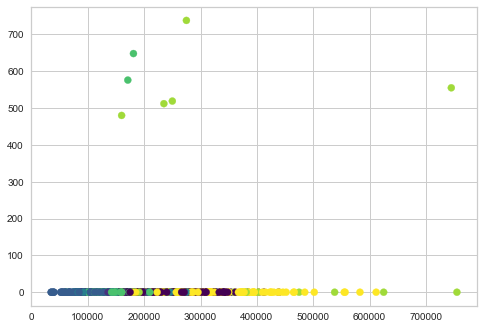

In [197]:
plt.scatter(New_df['SalesPrice'], New_df['PoolArea'], c=New_df['labels'], s=50, cmap='viridis')

In [198]:
## I get the output to use 8 clusters, lets see what that does. 
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters)
# Train model
New_std_cluster = cluster.fit(New_std)

New_df['labels'] = New_std_cluster.labels_

New_df.groupby('labels').mean().describe().round(1) 



,MSSubClass,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
count,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
mean,57.5,11225.2,1.8,2.8,0.0,3.0,0.1,2.1,2.0,0.5,3.2,6.5,5.5,1979.5,1990.0,1.4,1.1,9.9,10.6,2.4,3.8,1.6,483.1,41.8,619.3,1144.2,1.0,1.2,1.0,1235.8,395.9,5.3,1637.0,0.5,0.1,1.7,0.4,2.9,1.0,2.2,6.8,5.8,0.7,1.9,520.0,1.9,107.3,55.9,17.5,4.0,15.7,3.2,38.4,6.4,2007.8,7.5,3.9,203631.2
std,12.7,2356.8,0.4,0.1,0.0,0.1,0.0,0.1,0.0,0.2,1.5,1.2,0.3,23.7,14.7,0.2,0.1,0.7,0.7,0.5,0.1,0.4,208.3,15.3,194.7,395.6,0.0,1.0,0.1,351.4,445.1,4.9,374.2,0.2,0.0,0.4,0.4,0.4,0.0,0.5,0.9,0.1,0.3,0.5,138.3,0.1,38.7,27.0,12.9,2.1,1.9,1.7,23.4,0.2,0.1,0.3,0.3,66303.4
min,46.8,9035.9,1.5,2.7,0.0,2.8,0.1,1.9,2.0,0.4,2.3,5.2,5.2,1952.8,1973.4,1.3,1.0,9.0,9.7,1.9,3.6,1.0,353.7,27.6,462.2,892.5,1.0,0.4,0.9,1026.0,88.9,0.0,1224.8,0.3,0.0,1.2,0.2,2.6,1.0,1.6,5.9,5.7,0.4,1.4,369.9,1.7,65.6,25.0,7.1,2.1,13.5,1.6,11.4,6.2,2007.7,7.2,3.6,130949.2
25%,50.5,9978.0,1.6,2.8,0.0,2.9,0.1,2.0,2.0,0.4,2.4,6.0,5.3,1970.3,1984.5,1.3,1.1,9.6,10.4,2.1,3.7,1.4,363.0,33.7,510.4,916.2,1.0,0.6,0.9,1032.9,140.7,3.2,1477.6,0.4,0.0,1.6,0.2,2.7,1.0,1.9,6.3,5.7,0.6,1.7,459.0,1.9,90.0,46.4,10.2,2.9,15.1,2.4,31.1,6.3,2007.8,7.4,3.7,175042.8
50%,54.2,10920.0,1.6,2.8,0.0,3.1,0.1,2.2,2.0,0.4,2.5,6.8,5.4,1987.9,1995.6,1.4,1.1,10.2,11.0,2.3,3.8,1.8,372.3,39.8,558.6,939.9,1.0,0.8,1.0,1039.8,192.4,6.5,1730.4,0.4,0.0,1.9,0.2,2.8,1.0,2.1,6.8,5.8,0.8,2.1,548.1,2.0,114.4,67.8,13.4,3.7,16.7,3.3,50.8,6.4,2007.8,7.5,3.9,219136.5
75%,62.9,12319.9,1.9,2.8,0.0,3.1,0.1,2.2,2.0,0.6,3.7,7.2,5.6,1992.9,1998.3,1.5,1.1,10.3,11.0,2.6,3.9,1.8,547.8,48.9,697.9,1270.1,1.0,1.6,1.0,1340.6,549.3,8.0,1843.0,0.5,0.1,2.0,0.6,3.0,1.0,2.4,7.3,5.8,0.8,2.2,595.1,2.0,128.2,71.4,22.7,5.0,16.9,4.1,51.9,6.5,2007.8,7.6,4.0,239972.2
max,71.5,13719.8,2.3,2.8,0.0,3.1,0.1,2.2,2.0,0.8,4.9,7.5,5.8,1997.9,2001.1,1.7,1.2,10.4,11.1,2.9,3.9,1.9,723.4,58.1,837.1,1600.2,1.1,2.3,1.0,1641.5,906.3,9.5,1955.6,0.6,0.1,2.0,0.9,3.3,1.1,2.7,7.7,5.9,0.9,2.4,642.1,2.0,142.0,74.9,31.9,6.3,17.1,4.9,53.1,6.5,2007.8,7.7,4.1,260807.9


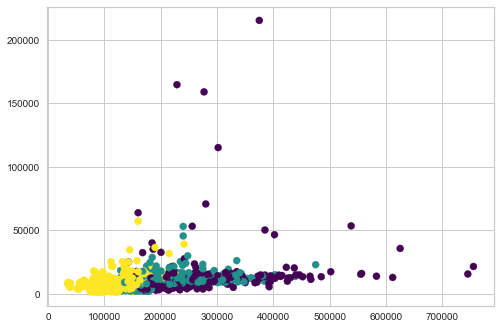

In [203]:
plt.scatter(New_df['SalesPrice'], New_df['LotArea'], c=New_df['labels'], s=50, cmap='viridis')
### the clearest cluster here is cheap and small

In [ ]:
### didn't take out the oultiers at the beginning for pricing, I wanted to see if this was on influence on the 
## different factoring that would occure. Then forgot to to it before I ran the K-means. Now I can't see the
## clusters very clearly. 

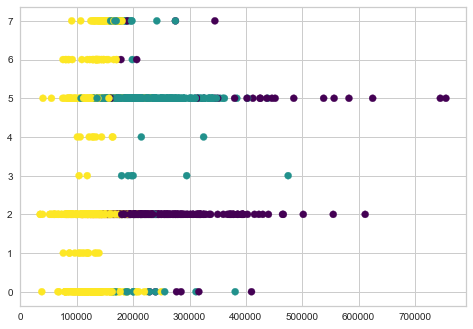

In [215]:
plt.scatter(New_df['SalesPrice'], New_df['HouseStyle'], c=New_df['labels'], s=50, cmap='viridis')
### housestyle 5 occures a lot for the blue cluster

In [ ]:
###after plotting a lot of things I see that maybe using 4 clusters would have been better then 3, there is a lot of 
### overlap between the blue and purple ones. 

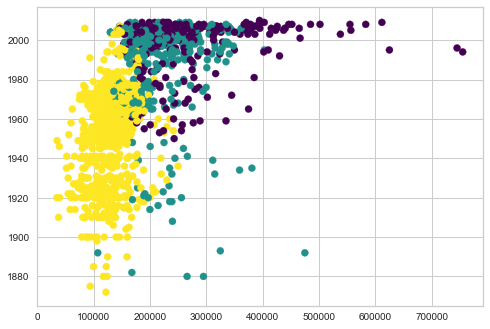

In [220]:
plt.scatter(New_df['SalesPrice'], New_df['YearBuilt'], c=New_df['labels'], s=50, cmap='viridis')
### here I see that the most middel and more expensive houses are the most young ones. 

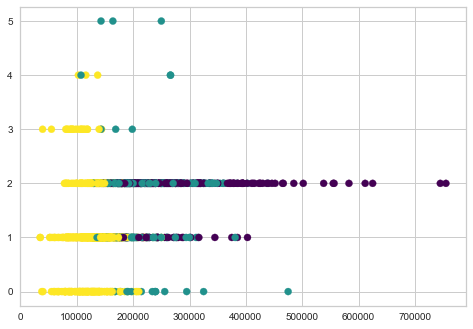

In [230]:
plt.scatter(New_df['SalesPrice'], New_df['Foundation'], c=New_df['labels'], s=50, cmap='viridis')
### here I see that the houses with 1 or 2 foundation are never very cheap. 

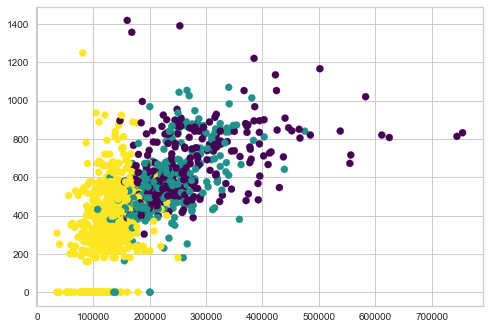

In [236]:
plt.scatter(New_df['SalesPrice'], New_df['GarageArea'], c=New_df['labels'], s=50, cmap='viridis')
### here I see that the houses with 1 or 2 foundation are never very cheap. 

In [231]:
###What my plan was with factor analysis was to see a sort of the following combined factors:

#1 house A with foundation X with a house style of G and a Paved drive way
#2 house B with foundation Y with a house style of H and a No Paved drive way
#3 house C with foundation Z with a house style of I and a Fire place
#4 house D with foundation V with a house style of J and a Garage

In [ ]:
# after that make clusters and see how these factors are of influence on house price but also on overal quality. 

In [242]:
#to measure preformance of the model I should have used the silhouette_score, and then I would have been able to make
#beter choices for my clusters etc. but i ran out of time. 
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(New_df, n_clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)